# The project consist of classifying flowers species with the Iris dataset

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

from sklearn.datasets import load_iris

In [5]:
iris = load_iris()
X = iris.data
y = iris.target

print(iris.DESCR) ##Description of the Dataset 

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
data = pd.DataFrame(X, columns=iris.feature_names)

data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
data["Species"] = y

data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
data.shape

(150, 5)

In [9]:
data["Species"].unique() ## Three unique categories of the species (Iris-Setosa, Iris-Versicolour, Iris-Virginica)

array([0, 1, 2])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
Species              150 non-null int64
dtypes: float64(4), int64(1)
memory usage: 5.9 KB


In [11]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


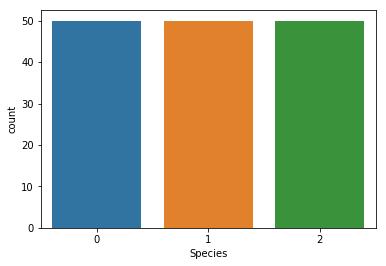

In [19]:
sns.countplot(data["Species"]) ## For each class they have the same equal of instances

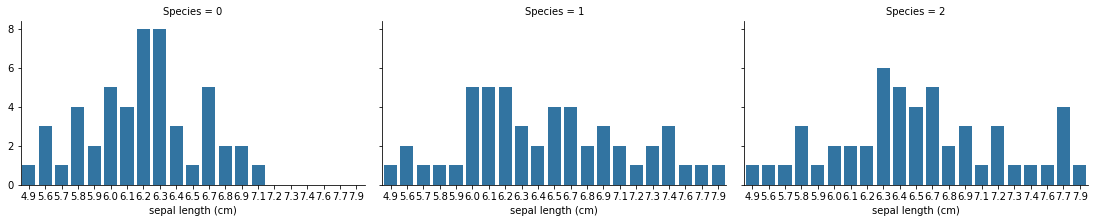

In [21]:
grid = sns.FacetGrid(data, col='Species', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'sepal length (cm)')

## Checking the the maximum and minimum length in cm of each value

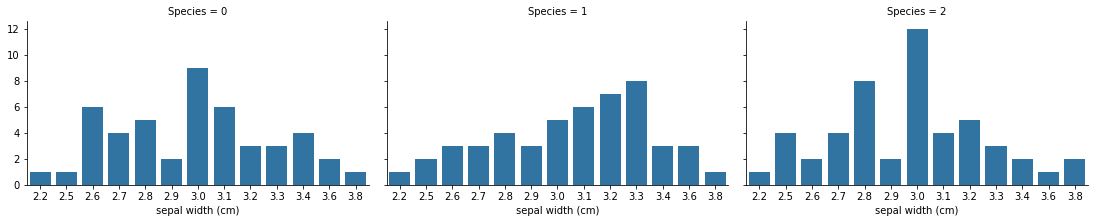

In [24]:
grid = sns.FacetGrid(data, col='Species', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'sepal width (cm)')

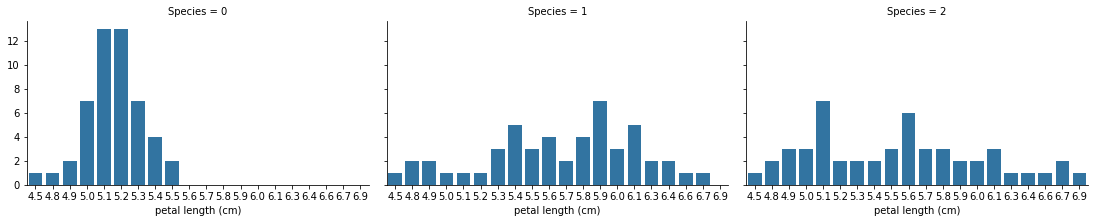

In [23]:
grid = sns.FacetGrid(data, col='Species', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'petal length (cm)')

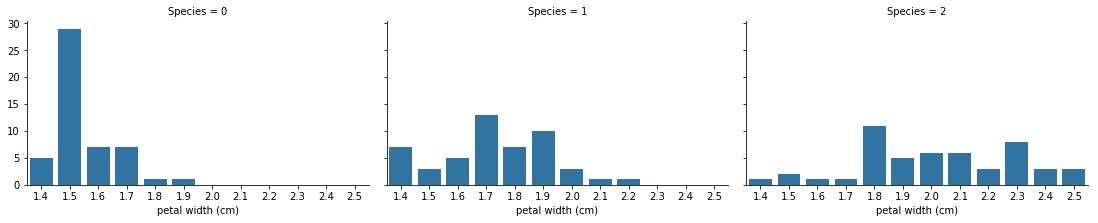

In [22]:
grid = sns.FacetGrid(data, col='Species', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'petal width (cm)')

In [25]:
data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=42)

In [31]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(135, 4)
(135,)
(15, 4)
(15,)


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

models = {
    'Logistic_Regression': LogisticRegression(random_state=42),
    'SVC': SVC(kernel='rbf', gamma=0.5, probability=True),
    'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=1, random_state=42),
    'GradientBoostingClassifier': GradientBoostingClassifier(max_depth=1, n_estimators=3, learning_rate=1.0, random_state=42)
}

In [49]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

def loss(y_true, y_pred, retur=False):
    pre = precision_score(y_true, y_pred, average="macro")
    rec = recall_score(y_true, y_pred, average="macro")
    accuracy = accuracy_score(y_true, y_pred)
    
    if retur:
        return pre, rec,accuracy
    else:
        print(pre)
        print(rec)
        print(accuracy)

In [50]:
def train_and_eval(models, X,y):
    for name, model in models.items():
        print(name, ':' )
        model.fit(X,y)
        loss(y, model.predict(X))
        print('*' * 30)

In [51]:
train_and_eval(models, X_train, y_train)

Logistic_Regression :
0.9738562091503268
0.9696969696969697
0.9703703703703703
******************************
SVC :
0.98
0.9772727272727272
0.9777777777777777
******************************
DecisionTreeClassifier :
0.5054945054945055
0.6666666666666666
0.674074074074074
******************************
GradientBoostingClassifier :
0.9636627906976744
0.9630883301096067
0.9629629629629629
******************************


In [53]:
gra =  GradientBoostingClassifier(max_depth=1, n_estimators=3, learning_rate=1.0, random_state=42)

gra.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=3,
              n_iter_no_change=None, presort='auto', random_state=42,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [56]:
gra.predict([[2.2,4.5,4.6,5.2]]) ##Random values to make a prediction 

array([2])

In [63]:
from sklearn.externals import joblib

joblib.dump(gra, 'model.pkl')

grad = joblib.load('model.pkl')